# Loading libraries

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

# Loading data

In [2]:
# Loading raw data

#reds = pd.read_csv('.\static\data\wineQualityReds.csv')
#reds['type'] = 'red'

#whites = pd.read_csv('.\static\data\wineQualityWhites.csv')
#whites['type'] = 'white'

#data = reds.append(whites)
#data = data.drop('Unnamed: 0',1)

#data.to_csv('.\static\data\wineQuality.csv', header=True, index=None)

data = pd.read_csv('.\static\data\wineQualityReds.csv')
data = data.drop('Unnamed: 0',1)

# Data analysis

In [3]:
# Finding correlations between features 
# The higher the values, the stronger the relationships are
# It means when one feature increases, the other one tends to increase as well and vice-versa
correlations = data.corr()['quality'].drop('quality')
correlations.sort_values(ascending = False)

alcohol                 0.476166
sulphates               0.251397
citric.acid             0.226373
fixed.acidity           0.124052
residual.sugar          0.013732
free.sulfur.dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total.sulfur.dioxide   -0.185100
volatile.acidity       -0.390558
Name: quality, dtype: float64

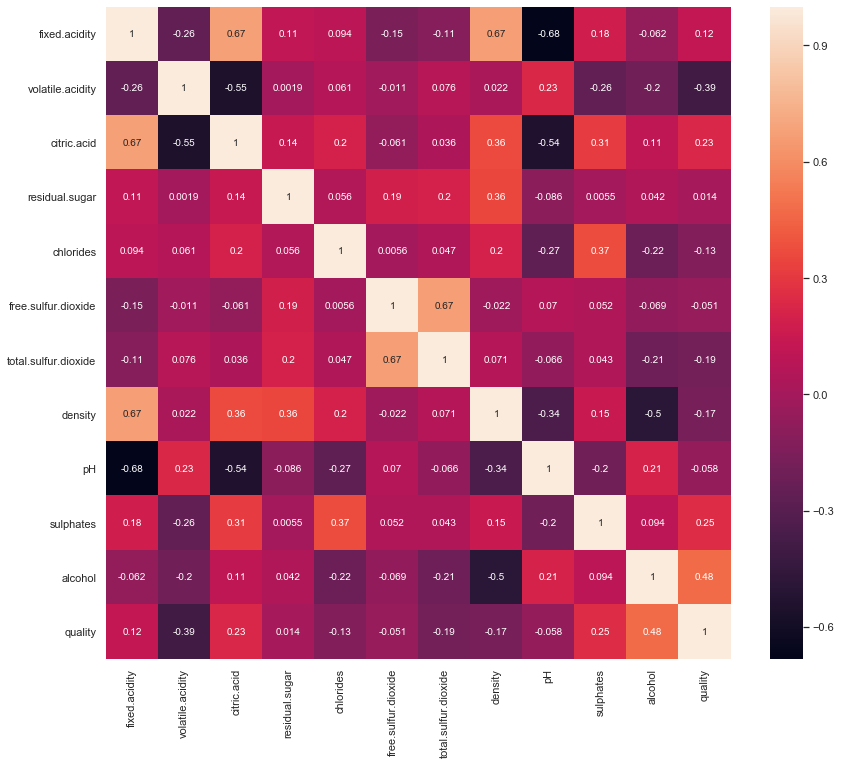

In [4]:
# Visualizing correlations
plt.figure(figsize = (14,12))
sns.heatmap(data.corr(), annot=True, linewidths=0)
plt.show()

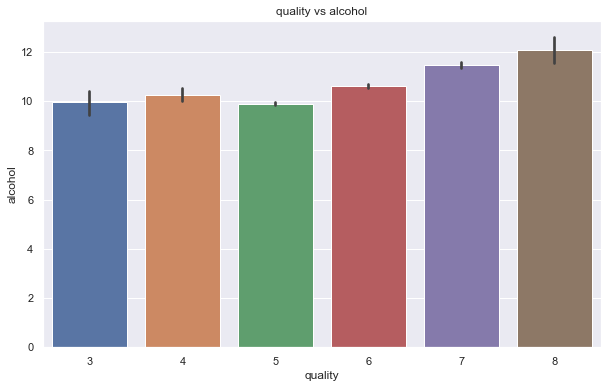

In [5]:
# Quality vs Alcohol
plt.figure(figsize = (10,6))
plt.title('quality vs alcohol')
sns.barplot(x = data['quality'], y = data['alcohol'], data = data)

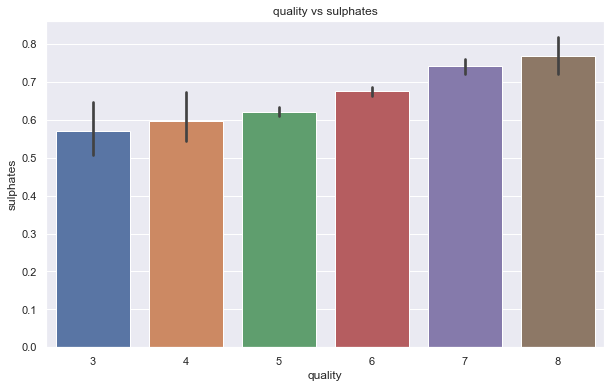

In [6]:
# Quality vs Sulphates
plt.figure(figsize = (10,6))
plt.title('quality vs sulphates')
sns.barplot(x = data['quality'], y = data['sulphates'], data = data)

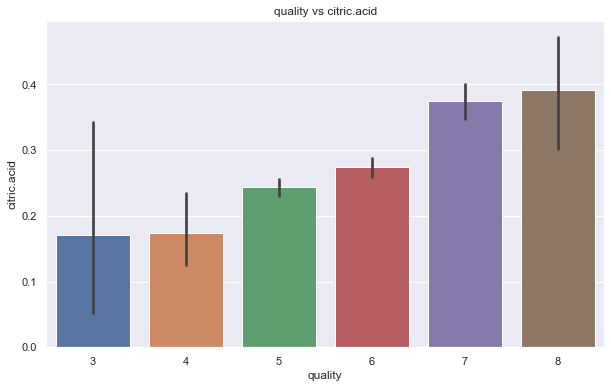

In [7]:
# Quality vs Citric Acid
plt.figure(figsize = (10,6))
plt.title('quality vs citric.acid')
sns.barplot(x = data['quality'], y = data['citric.acid'], data = data)

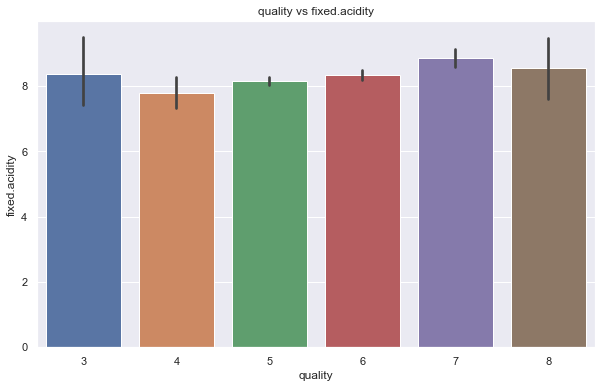

In [8]:
# Quality vs Fixed Acidity
plt.figure(figsize = (10,6))
plt.title('quality vs fixed.acidity')
sns.barplot(x = data['quality'], y = data['fixed.acidity'], data = data)

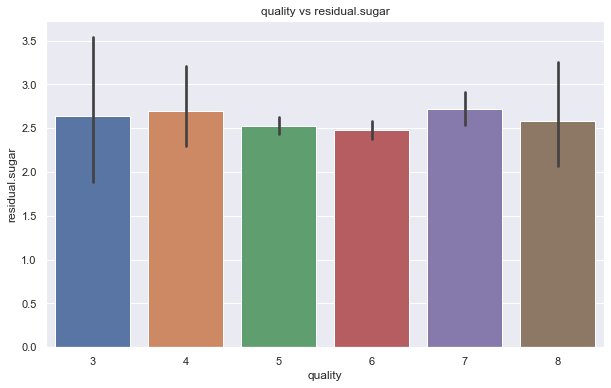

In [9]:
# Quality vs Residual Sugar
plt.figure(figsize = (10,6))
plt.title('quality vs residual.sugar')
sns.barplot(x = data['quality'], y = data['residual.sugar'], data = data)

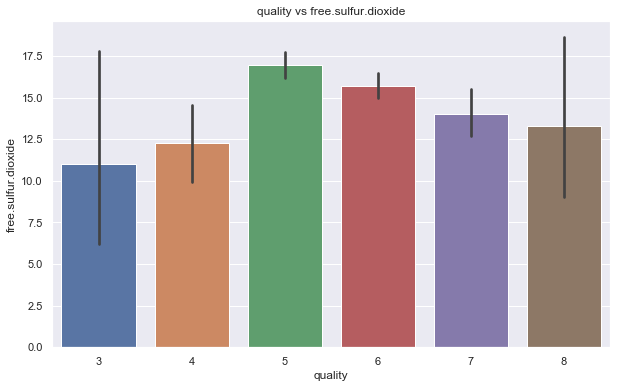

In [10]:
# Quality vs Free Sulfur Dioxide
plt.figure(figsize = (10,6))
plt.title('quality vs free.sulfur.dioxide')
sns.barplot(x = data['quality'], y = data['free.sulfur.dioxide'], data = data)

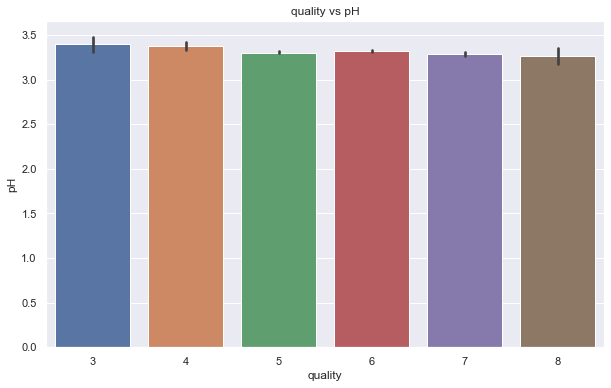

In [11]:
# Quality vs pH
plt.figure(figsize = (10,6))
plt.title('quality vs pH')
sns.barplot(x = data['quality'], y = data['pH'], data = data)

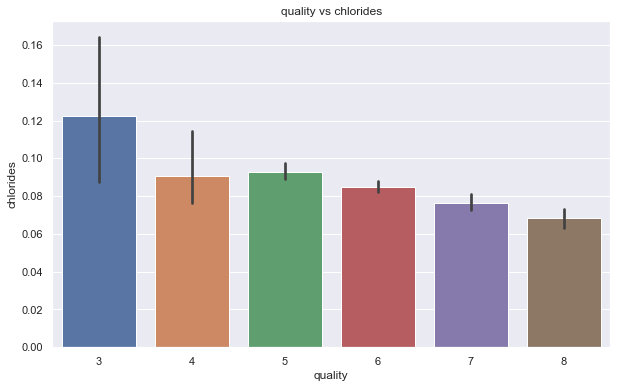

In [12]:
# Quality vs Chlorides
plt.figure(figsize = (10,6))
plt.title('quality vs chlorides')
sns.barplot(x = data['quality'], y = data['chlorides'], data = data)

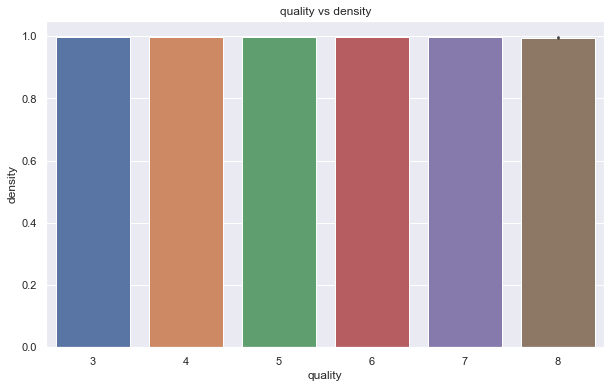

In [13]:
# Quality vs Density
plt.figure(figsize = (10,6))
plt.title('quality vs density')
sns.barplot(x = data['quality'], y = data['density'], data = data)

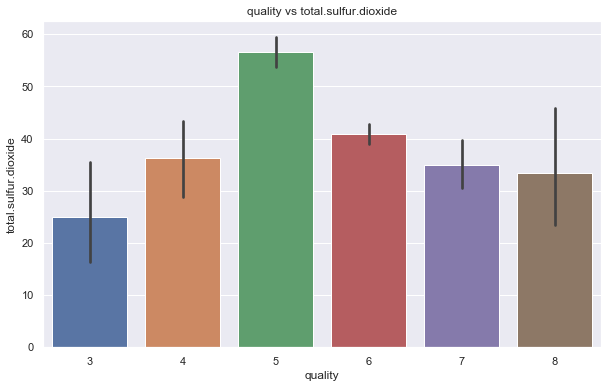

In [14]:
# Quality vs Total Sulfur Dioxide
plt.figure(figsize = (10,6))
plt.title('quality vs total.sulfur.dioxide')
sns.barplot(x = data['quality'], y = data['total.sulfur.dioxide'], data = data)

# Dataset

In [15]:
# Define dependent and independent variables
# Taking features with correlation greater than 0.05 as input x and quality as target variable y 
x = data[['alcohol','sulphates','citric.acid','fixed.acidity','residual.sugar','free.sulfur.dioxide','pH','chlorides','density','total.sulfur.dioxide','volatile.acidity']]
y = data['quality']

# Train, test, split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape

((1279, 11), (320, 11))

In [17]:
y_train.shape, y_test.shape

((1279,), (320,))

# Regression

In [18]:
# Fitting linear regression to training data
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Coefficients  
reg.coef_

array([ 2.81889567e-01,  8.41171623e-01, -1.40821461e-01,  2.30853339e-02,
        6.56431104e-03,  5.62733439e-03, -3.93687732e-01, -1.80650315e+00,
       -1.03515936e+01, -3.64444893e-03, -1.00130443e+00])

In [20]:
# Intercepts
reg.intercept_.round(3)

14.355

In [21]:
# R-squared
reg.score(x_train, y_train).round(3)

0.348

In [22]:
# Adjusted R-squared
r2 = reg.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2.round(3)

0.342

# Predictions

In [23]:
reg.predict(x_test)

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598